In [2]:
# Install TensorFlow and other dependencies (if not already installed)
!pip install tensorflow==2.10.0
!pip install matplotlib
!pip install scikit-learn
!pip install numpy==1.23

You should consider upgrading via the 'C:\Users\manis\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\manis\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\manis\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.14.1 requires numpy<2.3,>=1.23.5, but you have numpy 1.23.0 which is incompatible.
You should consider upgrading via the 'C:\Users\manis\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#  Import Required Libraries

In [20]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os


Define Dataset Paths

In [44]:
# Check if running in Google Colab
try:
    from google.colab import drive
    DRIVE_MOUNTED = False
except ImportError:
    DRIVE_MOUNTED = False

# Mount Google Drive if in Google Colab
if DRIVE_MOUNTED:
    drive.mount('/content/drive')
    train_dir = "/content/drive/MyDrive/ColabNotebooks/endoscopy-image-validator/dataset/train"
    val_dir = "/content/drive/MyDrive/ColabNotebooks/endoscopy-image-validator/dataset/validation"
    print(f"Mount Google Drive\n")
else:
    # Define dataset local paths
    train_dir = r'C:\xampp\htdocs\SLIIT\ENT-disease-detection-dl-models\cholesteatoma_detection_and_classification\endoscopy_image_validator\dataset\train'
    val_dir = r'C:\xampp\htdocs\SLIIT\ENT-disease-detection-dl-models\cholesteatoma_detection_and_classification\endoscopy_image_validator\dataset\validation'
    print(f"Mount Local Drive\n")

print(f"TRAIN DIR VALID: ", len(os.listdir(train_dir + "/valid")))
print(f"TRAIN DIR INVALID: ", len(os.listdir(train_dir + "/invalid")))

print(f"VALIDATION DIR VALID: ", len(os.listdir(val_dir + "/valid")))
print(f"VALIDATION DIR INVALID: ", len(os.listdir(val_dir + "/invalid")))

Mount Local Drive

TRAIN DIR VALID:  8000
TRAIN DIR INVALID:  8000
VALIDATION DIR VALID:  2000
VALIDATION DIR INVALID:  2000


 # Data Preprocessing

In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # ResNet50 input size
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# Load Pre-trained ResNet50

In [4]:
# Load ResNet50 model with ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the full model
model = models.Model(inputs=base_model.input, outputs=output)


# Compile the Model

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

# Train the Model

In [6]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
500/500 [==============================] - 943s 2s/step - loss: 0.3485 - accuracy: 0.9036 - val_loss: 0.1035 - val_accuracy: 0.9645
Epoch 2/20
500/500 [==============================] - 882s 2s/step - loss: 0.1835 - accuracy: 0.9216 - val_loss: 0.1303 - val_accuracy: 0.9572
Epoch 3/20
500/500 [==============================] - 881s 2s/step - loss: 0.1920 - accuracy: 0.9085 - val_loss: 0.0979 - val_accuracy: 0.9680
Epoch 4/20
500/500 [==============================] - 880s 2s/step - loss: 0.1514 - accuracy: 0.9380 - val_loss: 0.0917 - val_accuracy: 0.9697
Epoch 5/20
500/500 [==============================] - 844s 2s/step - loss: 0.1303 - accuracy: 0.9436 - val_loss: 0.0908 - val_accuracy: 0.9725
Epoch 6/20
500/500 [==============================] - 857s 2s/step - loss: 0.1504 - accuracy: 0.9312 - val_loss: 0.0778 - val_accuracy: 0.9728
Epoch 7/20
500/500 [==============================] - 877s 2s/step - loss: 0.1440 - accuracy: 0.9361 - val_loss: 0.1069 - val_accuracy: 0.9737

# Evaluate the Model

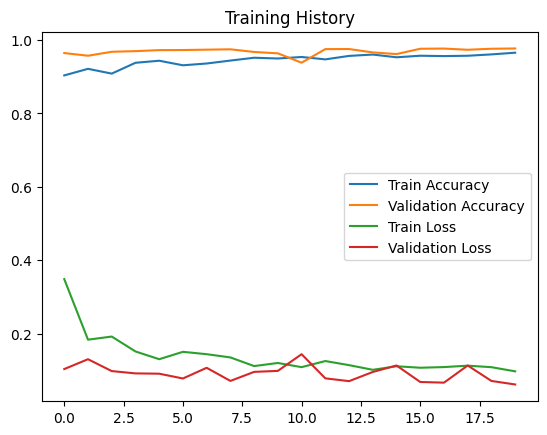

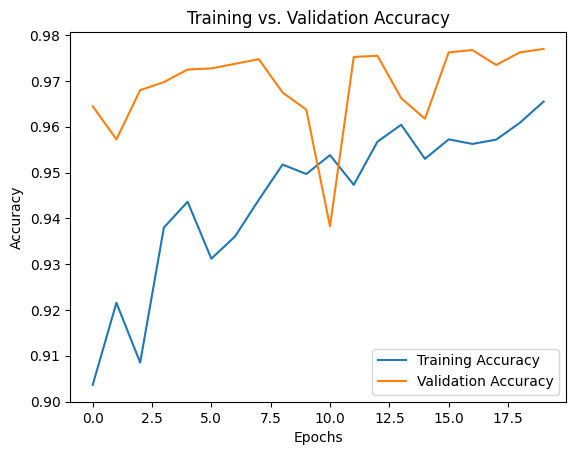

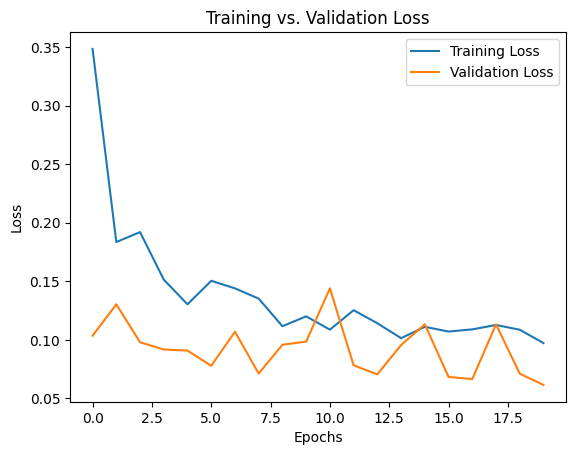

125/125 [==============================] - 170s 1s/step - loss: 0.0614 - accuracy: 0.9770
Validation Loss: 0.0614
Validation Accuracy: 0.9770
Total number of layers: 179


In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training History')
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()


# Evaluate on validation set
# val_loss, val_accuracy = model.evaluate(val_data)
# print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Print total number of layers in the model
print(f"Total number of layers: {len(model.layers)}")


Classification Report and Confusion Matrix

In [3]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Reset generator and predict on validation data
val_data.reset()
predictions = model.predict(val_data)

# Convert probabilities to binary predictions
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Get true labels
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

C:\Users\manis\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.sparse import csr_matrix, issparse


NameError: name 'val_data' is not defined

ROC Curve and AUC Score

In [4]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_scores = predictions.flatten()

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(true_classes, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


NameError: name 'predictions' is not defined

Precision-Recall Curve

In [5]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(true_classes, y_scores)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.', label='ResNet50')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


NameError: name 'true_classes' is not defined

# Save the Model

In [8]:
# Save the trained model
model.save('ResNet50_endoscopy_image_validator.h5')
print("Model saved as ResNet50_endoscopy_image_validator.h5")


Model saved as ResNet50_endoscopy_image_validator.h5


# Load and Test the Model

In [39]:
# Load the trained model
loaded_model = tf.keras.models.load_model('ResNet50_endoscopy_image_validator.h5')

# Test on new images
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)
    return "Valid" if prediction[0][0] > 0.5 else "Invalid"

# Example usage
# test_image_path = '/path/to/test/image.jpg'
test_image_path = r'C:\xampp\htdocs\SLIIT\ENT-disease-detection-dl-models\cholesteatoma_detection_and_classification\endoscopy_image_validator\dataset\test\cholesteatom.jpg'
print(f"Prediction: {predict_image(test_image_path)}")


1/1 [==============================] - 1s 978ms/step
Prediction: Valid
